# EDA for NIRF Ranking Dataset

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import svm

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = "./Datasets/Nirf"

overall_2016 = {}
overall = {}


for i in ['2017','2018','2019','2020','2021']:
    data_overall = pd.read_csv(directory+f"/{i}/OverallRanking_{i}.csv",encoding="unicode_escape")
    del data_overall['Institute Id']
    overall[i]=data_overall

# for k in ['Engineering','Management','Pharmacy','University']:
#   data_overall = pd.read_csv(directory+f"/2016/{k}Ranking_2016.csv",encoding="unicode_escape")
#   overall_2016[k]=data_overall


# Overall

## Notation

link for the nirf parameter definitions : <a href="https://www.nirfindia.org/Parameter">https://www.nirfindia.org/Parameter</a>

- Rank: Ranking Given by NIRF
- Score: Overall Score
- TLR: Teaching, Learning & Resources
- RPC: Research and Professional Practice 
- GO: Graduation Outcomes
- OI: Outreach and Inclusivity
- Perception: Peer and Employer Perception

More information: https://www.nirfindia.org/Docs/Ranking_Methodology_And_Metrics_2017.pdf pg9

In [3]:
indexes = set(overall['2021']['Institute Name'])

for j in overall.keys():
    k = set(overall[j]['Institute Name'])
    indexes = indexes.intersection(k)

a = list(indexes)
a.sort()
print(a)
print(len(a))


['Aligarh Muslim University', 'Amrita Vishwa Vidyapeetham', 'Anna University', 'Banaras Hindu University', 'Banasthali Vidyapith', 'Bharath Institute of Higher Education & Research', 'Bharathiar University', 'Birla Institute of Technology & Science', 'Calcutta University', 'Gauhati University', 'Homi Bhabha National Institute', 'Indian Institute of Science', 'Indian Institute of Science Education & Research Bhopal', 'Indian Institute of Science Education & Research Kolkata', 'Indian Institute of Science Education & Research Mohali', 'Indian Institute of Science Education & Research Pune', 'Indian Institute of Technology (Banaras Hindu University) Varanasi', 'Indian Institute of Technology Bhubaneswar', 'Indian Institute of Technology Bombay', 'Indian Institute of Technology Delhi', 'Indian Institute of Technology Gandhinagar', 'Indian Institute of Technology Guwahati', 'Indian Institute of Technology Hyderabad', 'Indian Institute of Technology Kanpur', 'Indian Institute of Technology K

In [4]:
data = pd.DataFrame()
for i in overall.keys():
    curr = overall[i][overall[i]['Institute Name'].isin(indexes)].assign(year=i)
    data = pd.concat([data,curr], axis=0)

In [5]:
display(data)

,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,year
0,Indian Institute of Science,Bengaluru,Karnataka,83.28,1,83.11,87.59,87.97,61.48,83.33,2017
1,Indian Institute of Technology Madras,Chennai,Tamil Nadu,73.97,2,69.49,72.60,84.02,76.75,68.70,2017
2,Indian Institute of Technology Bombay,Mumbai,Maharashtra,71.78,3,64.68,78.14,70.07,65.80,83.44,2017
3,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,68.43,4,55.07,70.46,85.11,72.85,64.72,2017
4,Indian Institute of Technology Delhi,New Delhi,Delhi,64.18,5,55.45,68.48,65.92,68.69,69.53,2017
...,...,...,...,...,...,...,...,...,...,...,...
85,PSG College of Technology,Coimbatore,Tamil Nadu,43.14,86,55.37,18.13,58.69,50.17,43.26,2021
86,Pondicherry University,Puducherry,Pondicherry,43.10,87,39.94,30.10,72.40,58.18,17.89,2021
89,North Eastern Hill University,Shillong,Meghalaya,42.79,90,55.53,16.31,74.61,51.63,11.62,2021
91,Sri Venkateswara University,Tirupati,Andhra Pradesh,42.78,92,51.21,19.87,79.19,50.61,5.57,2021


# Statistics for Overall

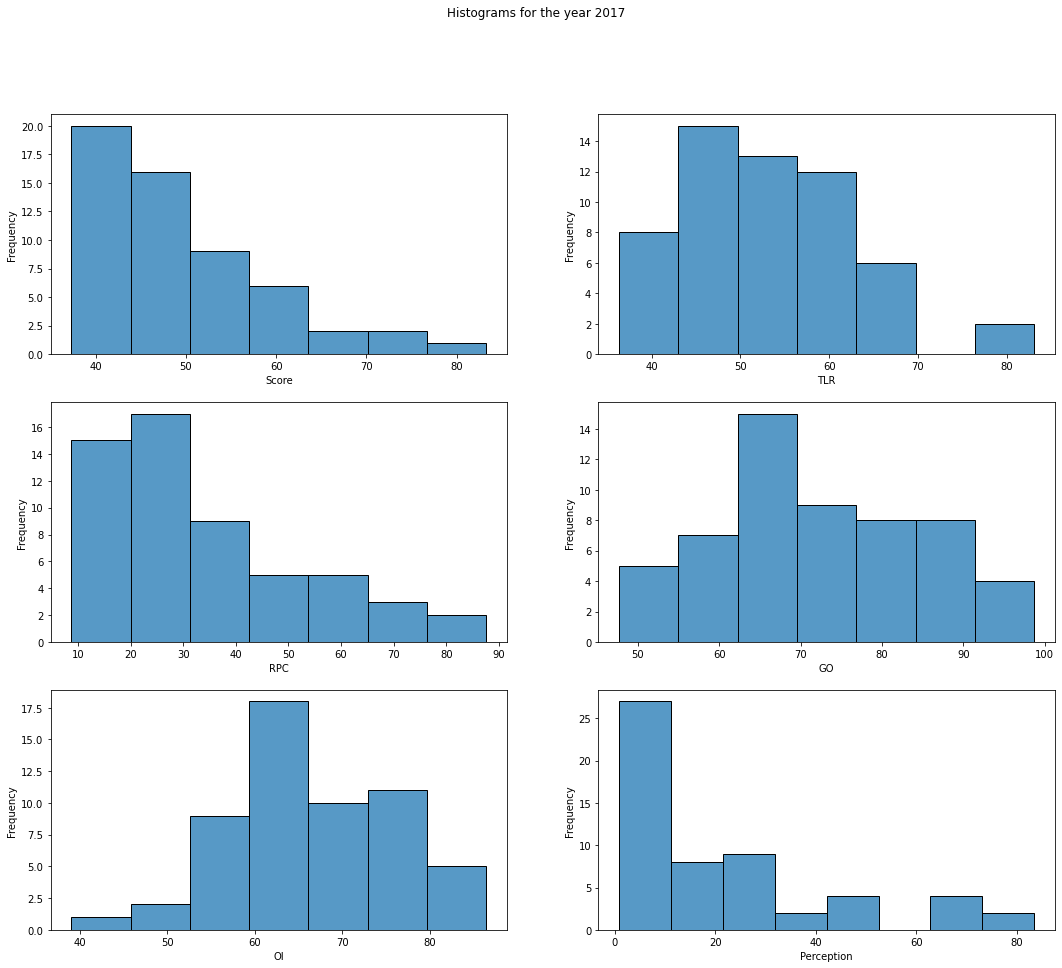

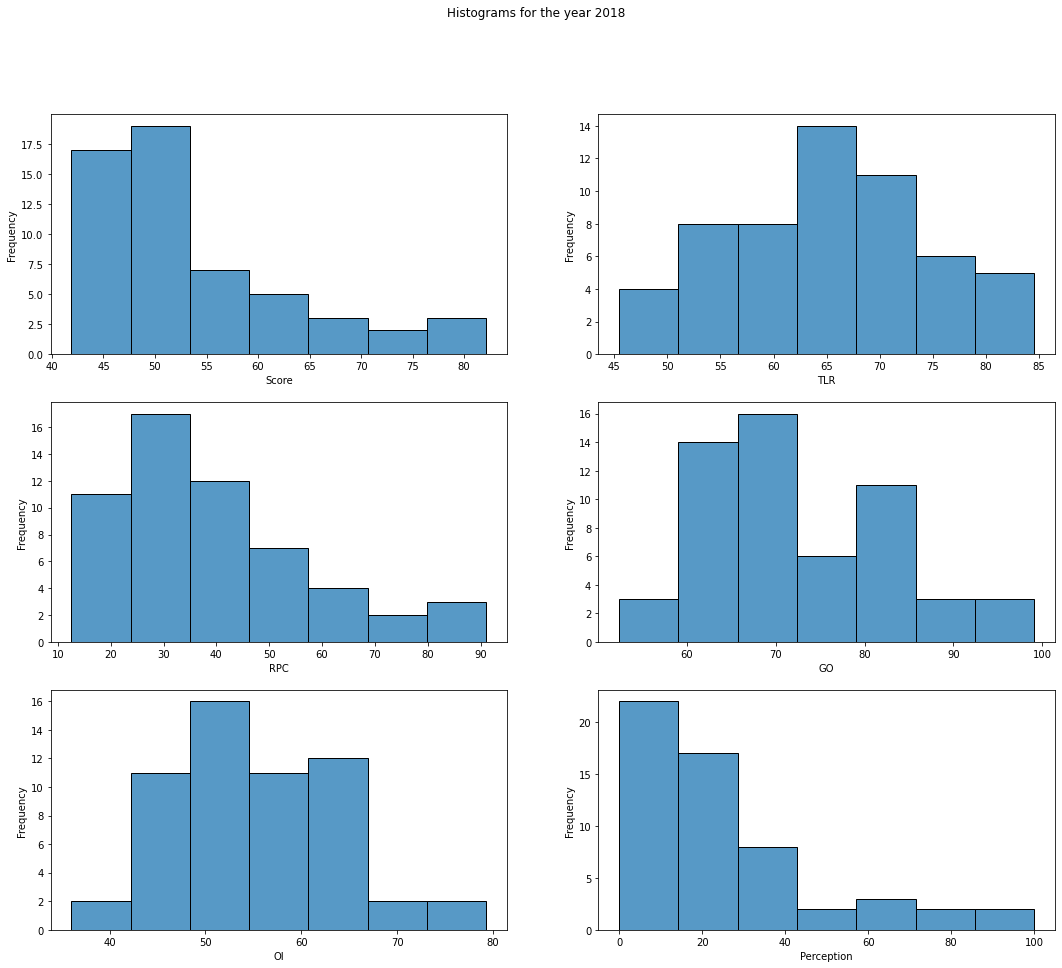

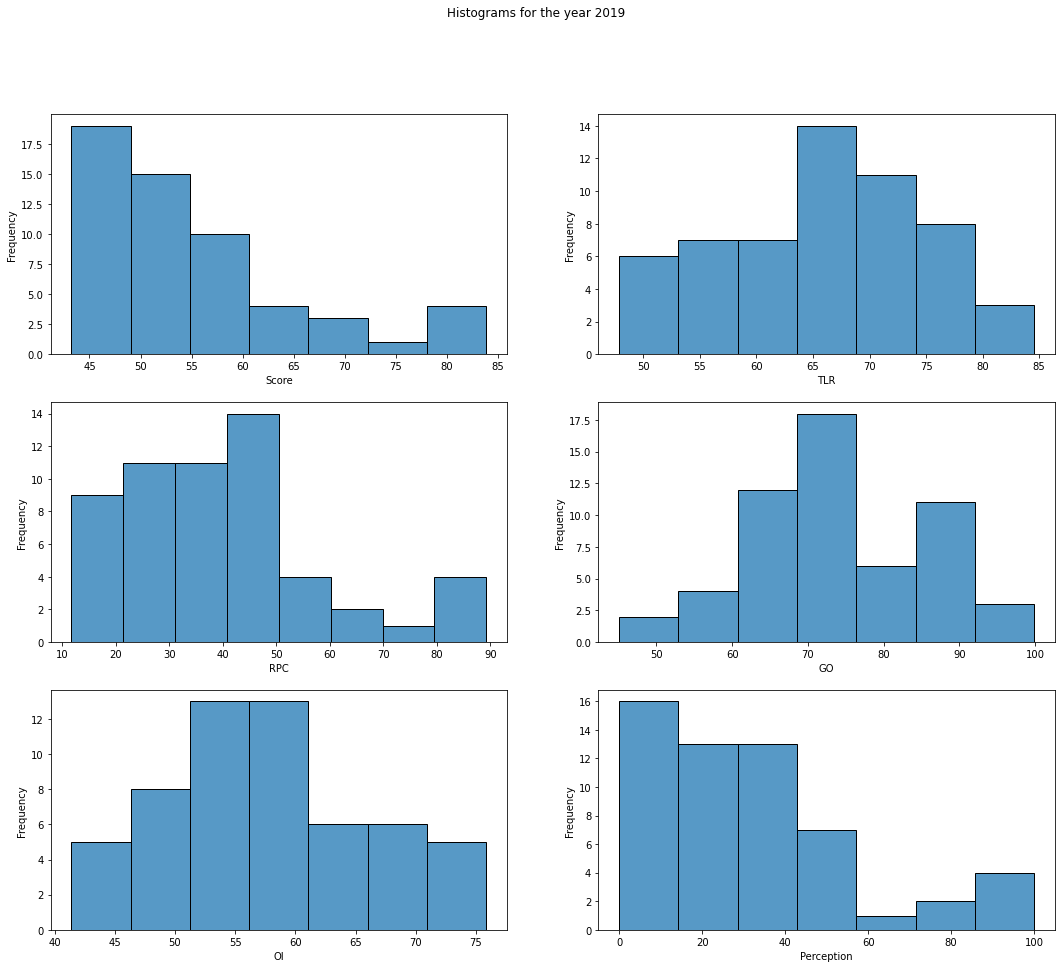

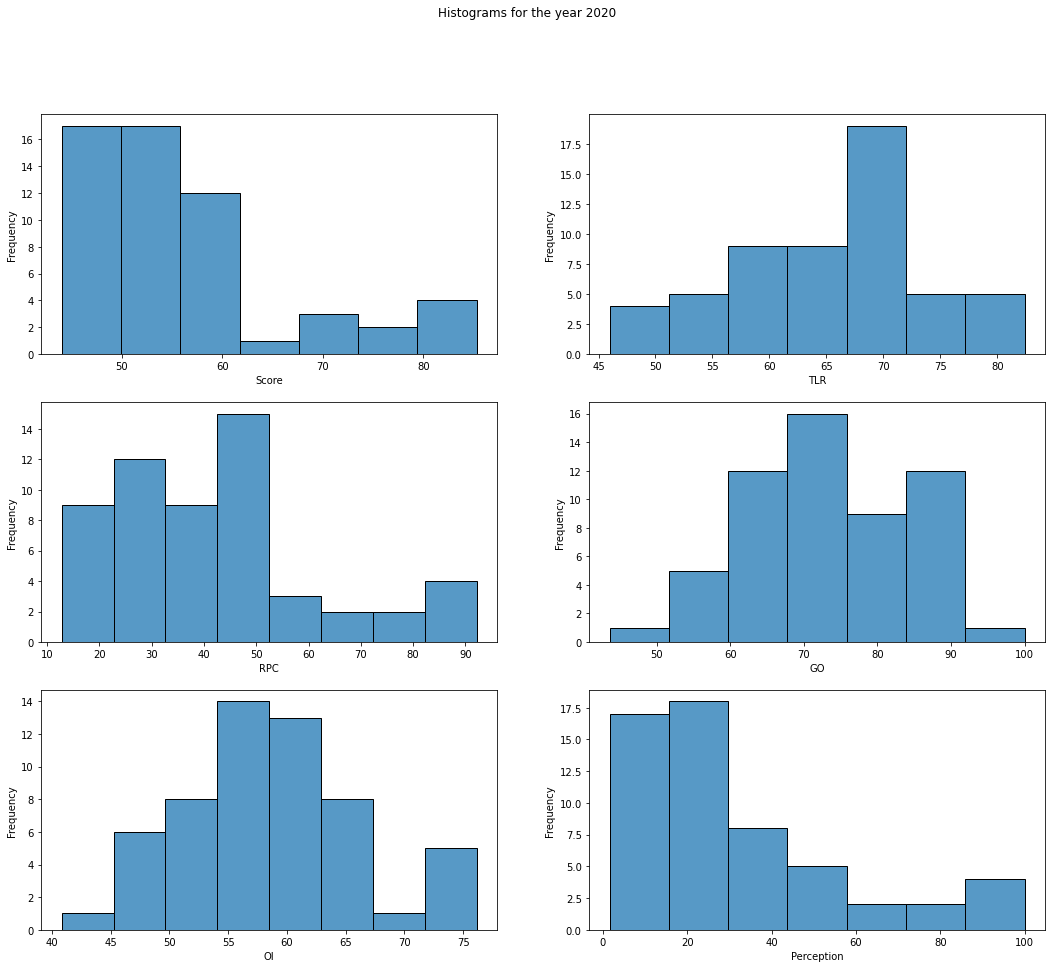

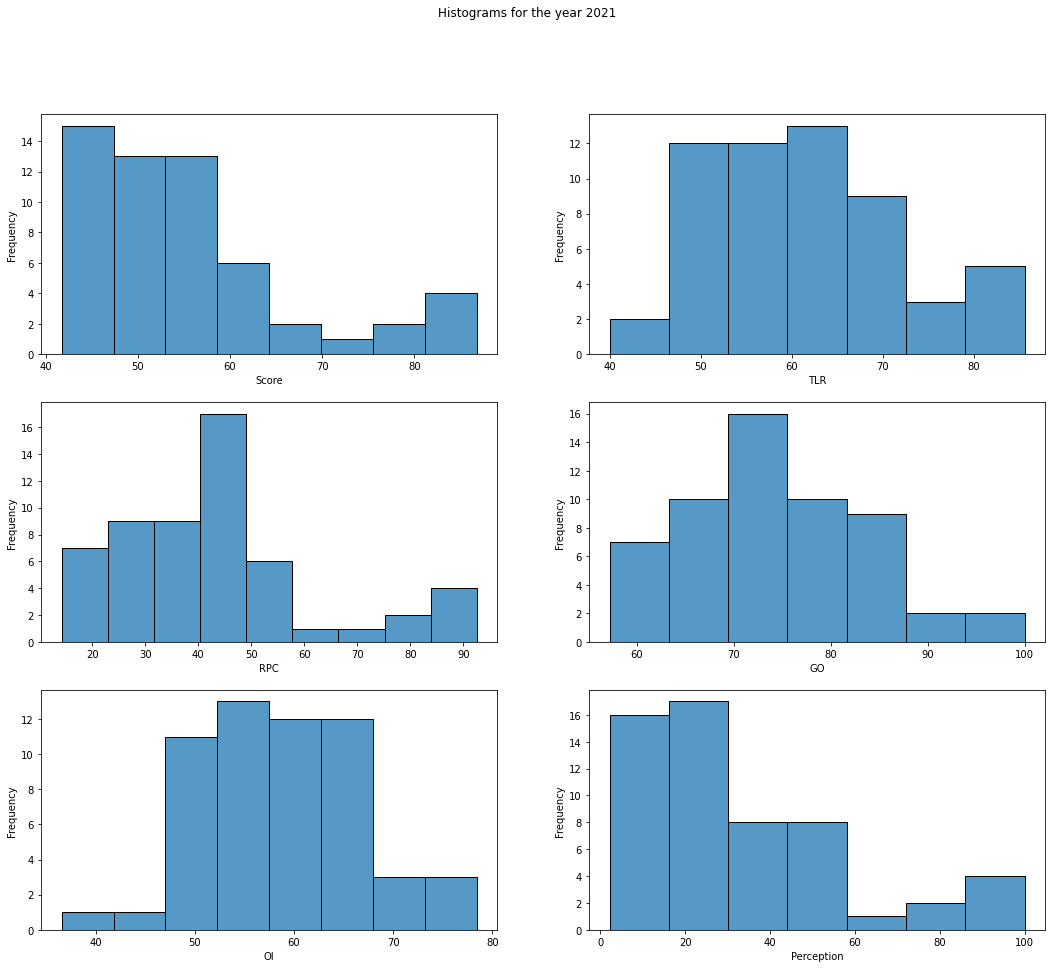

In [6]:
plt.rcParams['figure.figsize'] = [18,15]
for i,j in data.groupby('year'):
  cols=['Score','Rank','TLR','RPC','GO','OI','Perception']
  stat_data = j[cols]
  cols =['Score','TLR','RPC','GO','OI','Perception']
  plt.figure()
  plt.suptitle(f"Histograms for the year {i}")
  for k in range(len(cols)):
    plt.subplot(3,2,k+1)
    sns.histplot(stat_data[cols[k]], bins='auto')
    plt.xlabel(f"{cols[k]}")
    plt.ylabel(f"Frequency")
  plt.show()

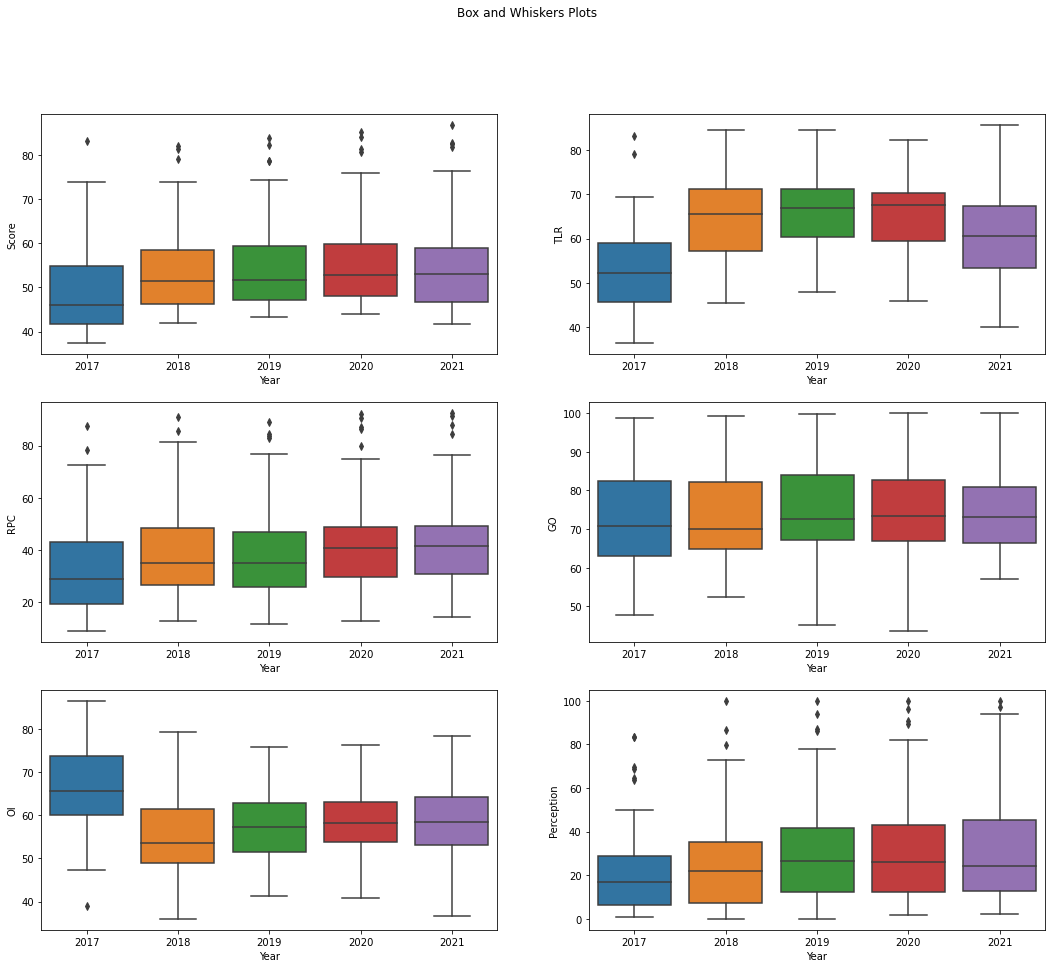

In [7]:
plt.rcParams['figure.figsize'] = [18,15]

cols = ['Score','TLR','RPC','GO','OI','Perception']
plt.figure()
plt.suptitle("Box and Whiskers Plots")
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x="year",y=cols[i],data=data)
    plt.xlabel("Year")
    plt.ylabel(cols[i])
plt.show()

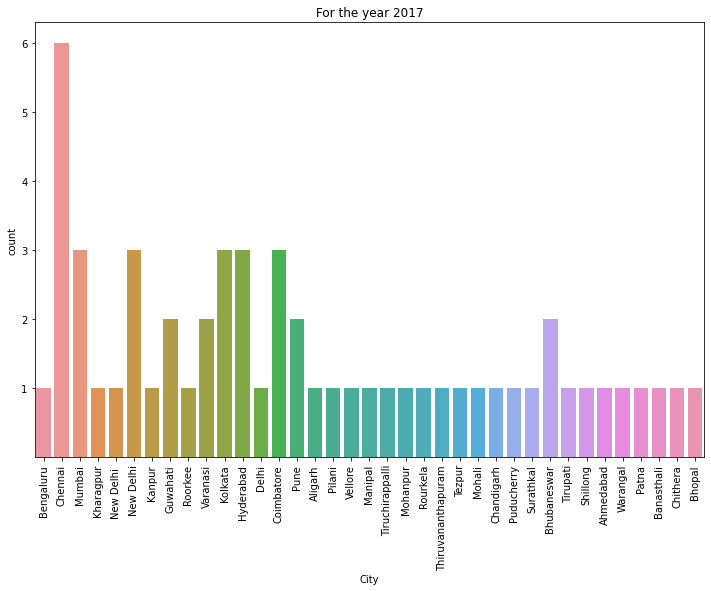

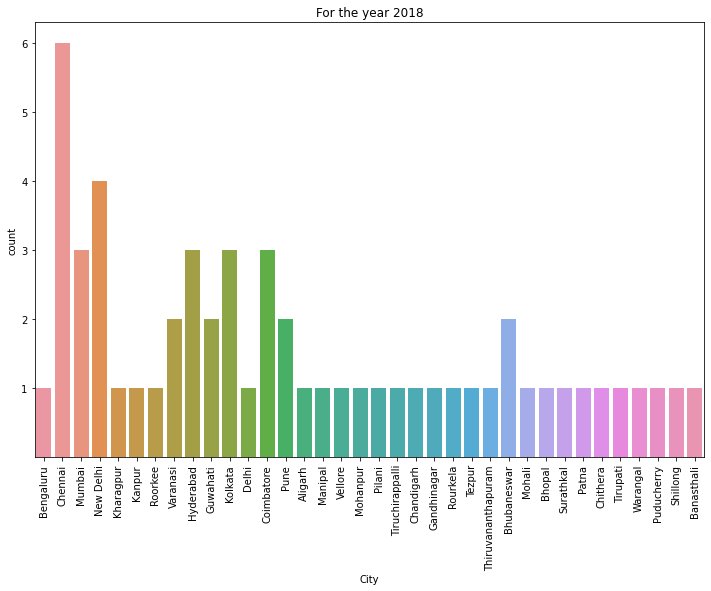

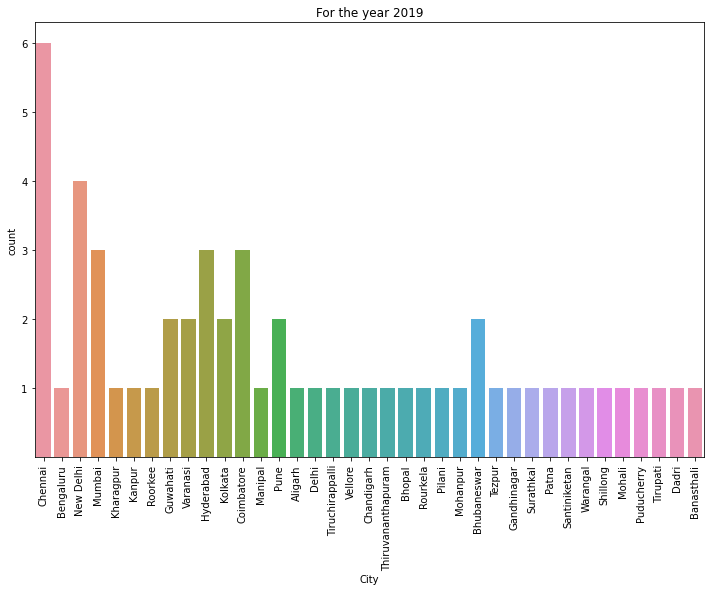

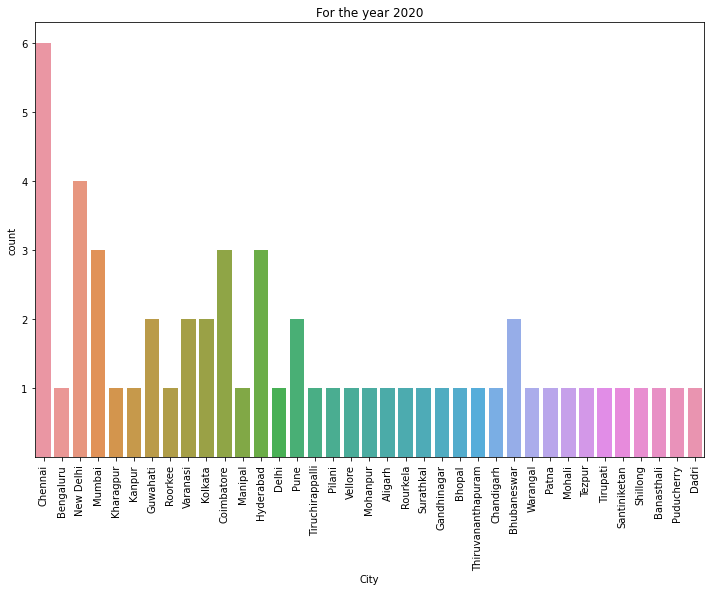

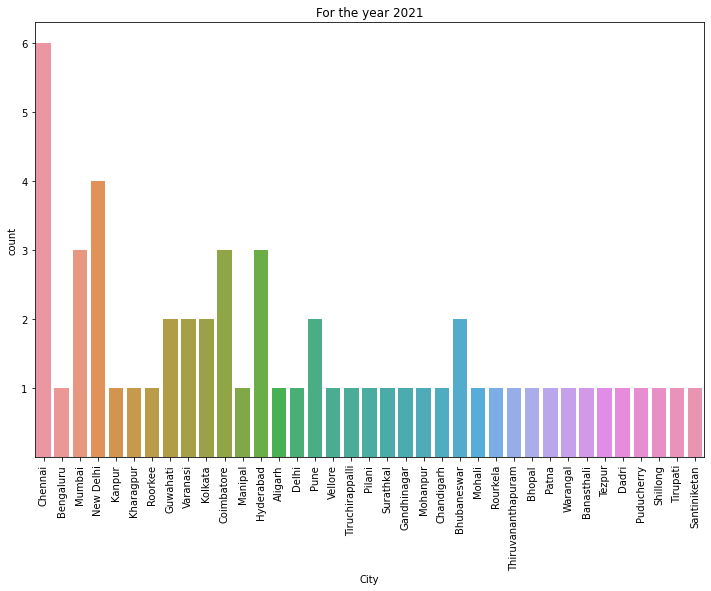

In [8]:
plt.rcParams['figure.figsize'] = [12,8]
for i,j in data.groupby('year'):
    val = j
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,10))
    plt.xlabel("City")
    plt.ylabel("No of colleges in top 100")
    sns.countplot(val['City'])
    plt.show()

# Majority are in Cities/Metropolitan areas and not in towns and villages

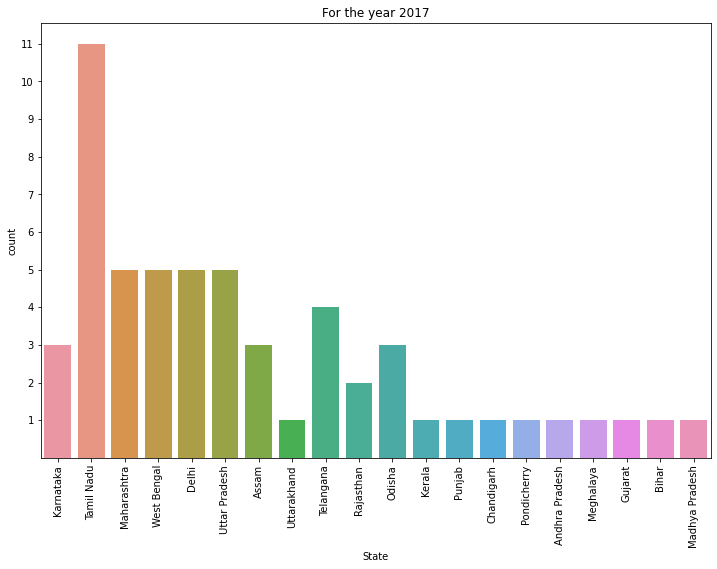

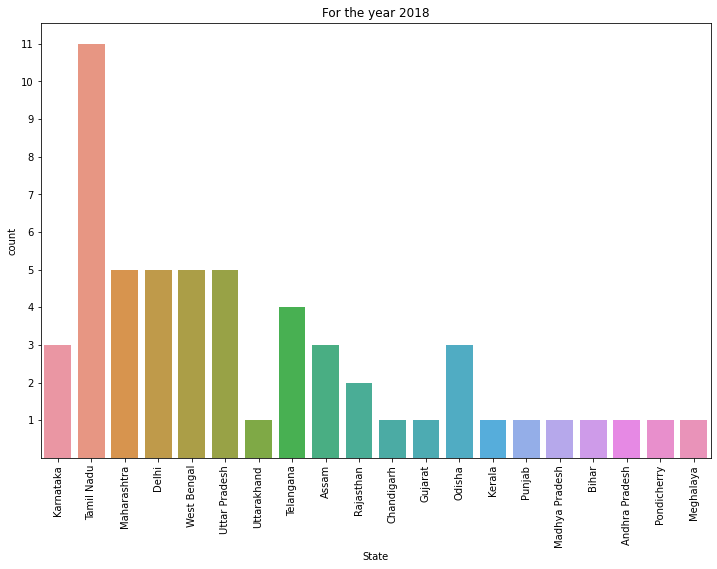

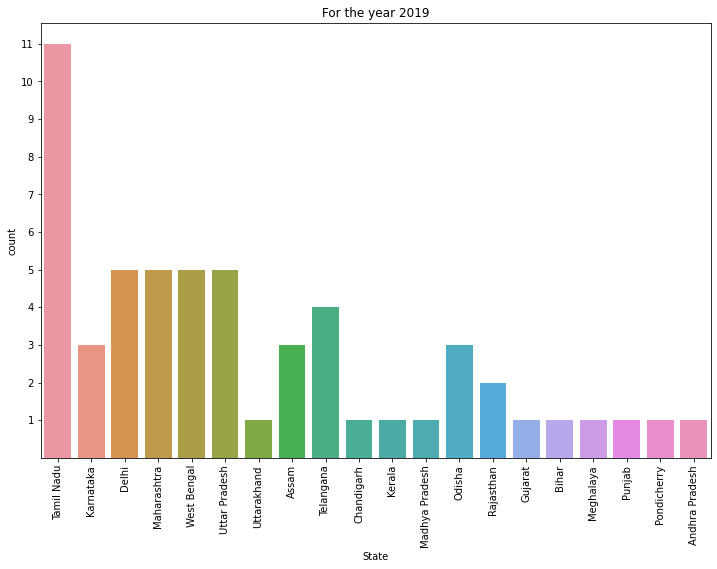

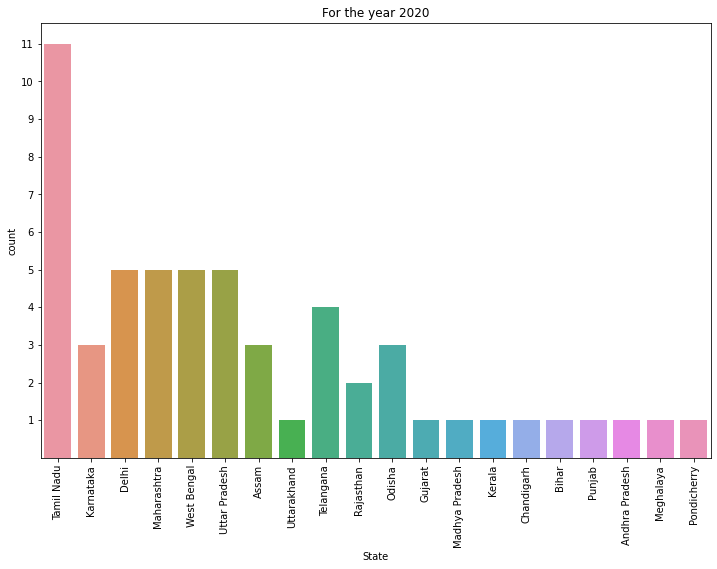

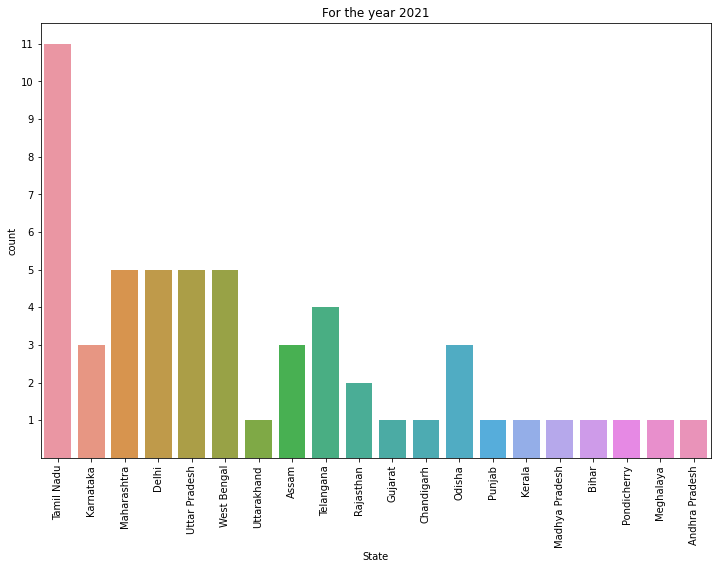

In [9]:
for i,j in data.groupby('year'):
    val = j
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,36))
    plt.xlabel("States")
    plt.ylabel("No of colleges in top 100")
    sns.countplot(val['State'])
    plt.show()

## For plots for all the 55 colleges

# Scatter

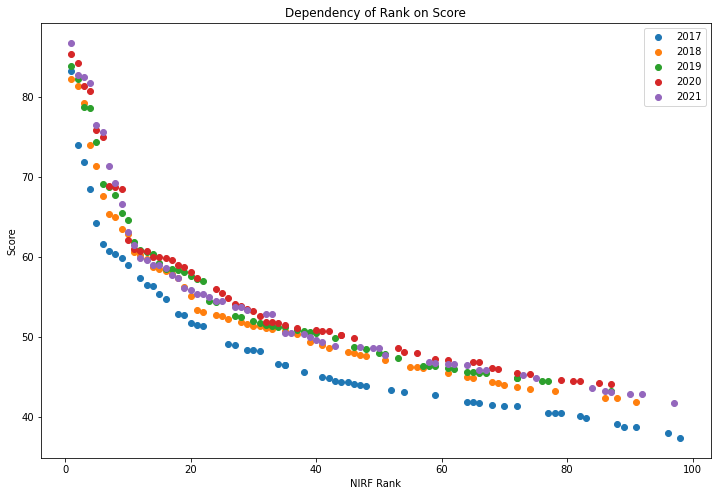

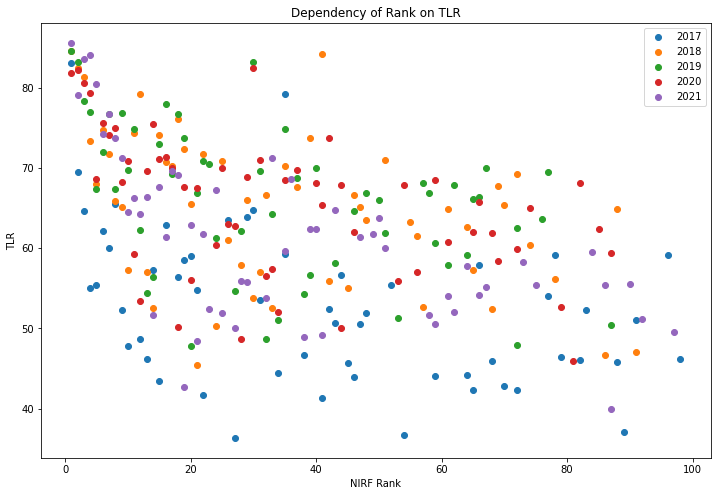

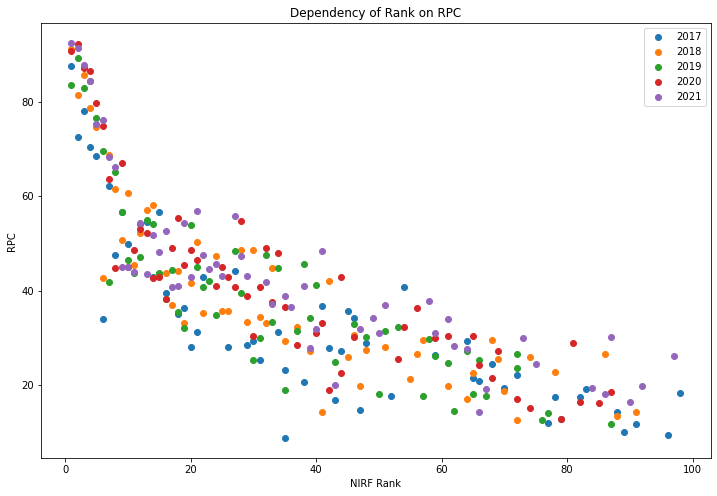

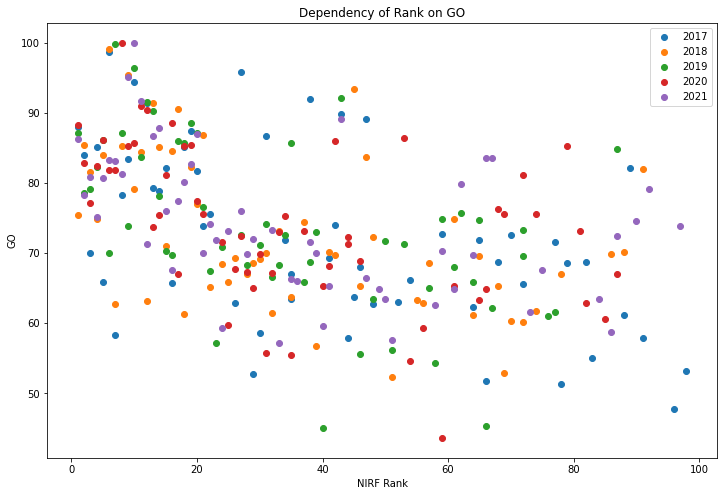

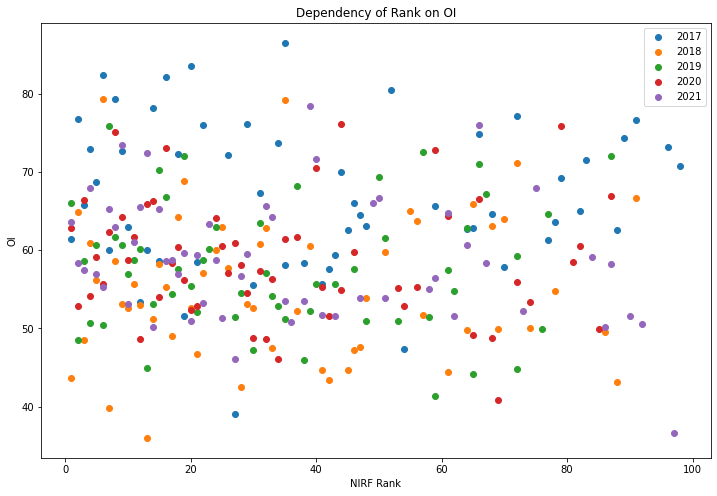

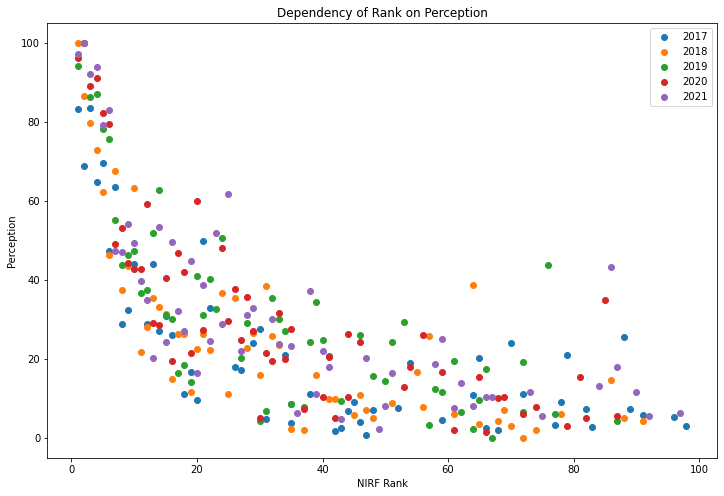

In [10]:
k=['Score','TLR','RPC','GO','OI','Perception']
for x in k:
    for i,j in data.groupby('year'):
        plt.scatter(j['Rank'],j[f"{x}"],label=f"{i}")
    plt.title(f"Dependency of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("NIRF Rank")
    plt.legend()
    plt.show()

# Line

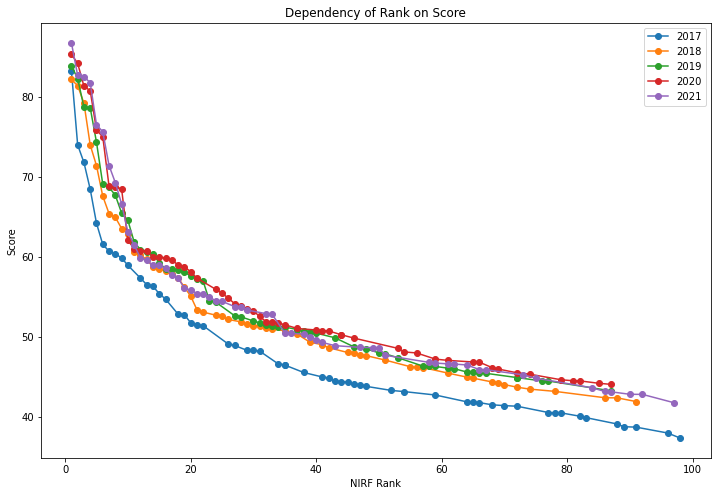

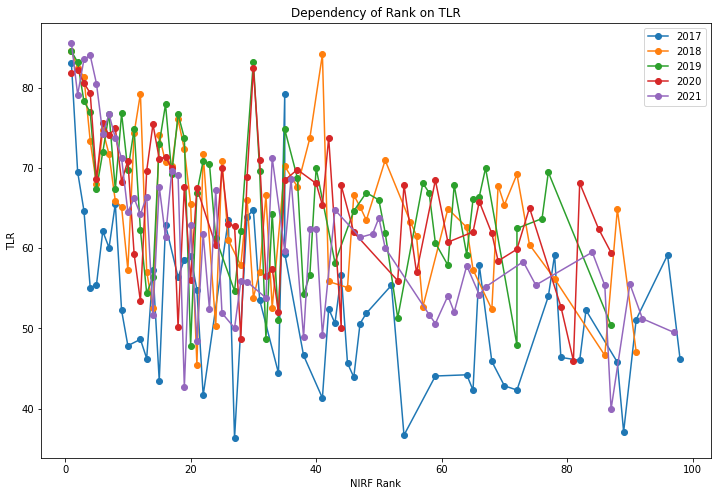

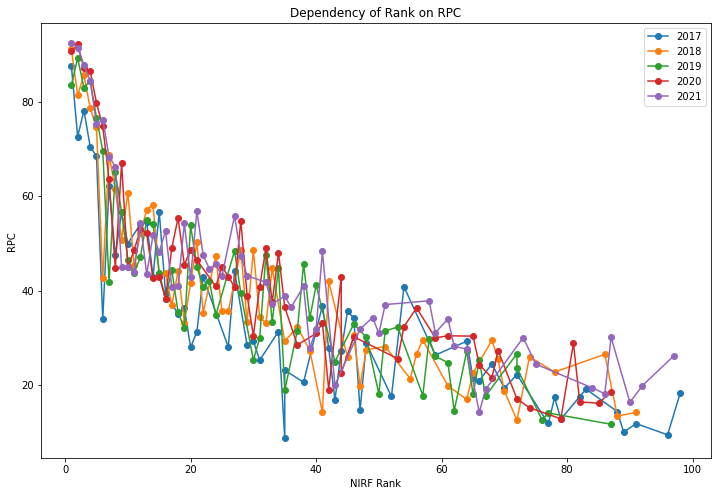

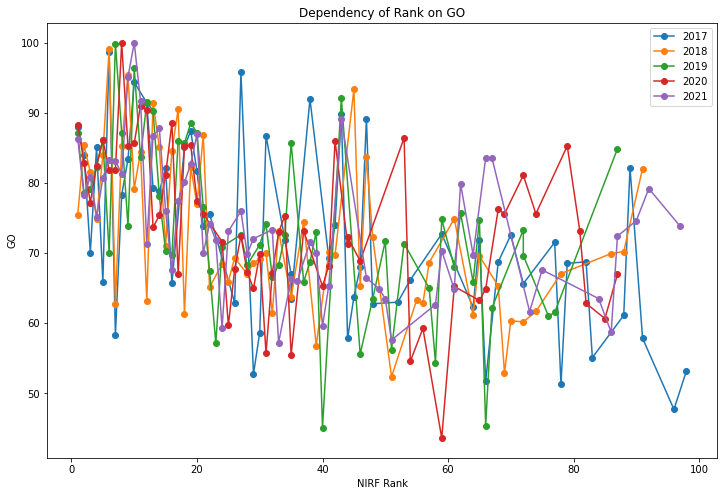

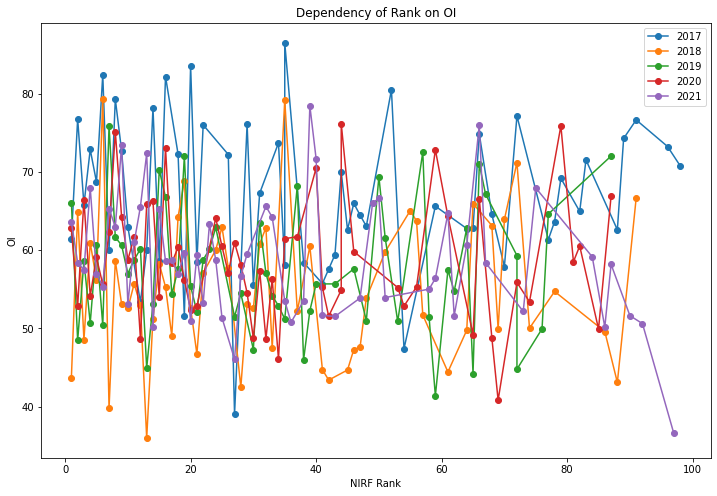

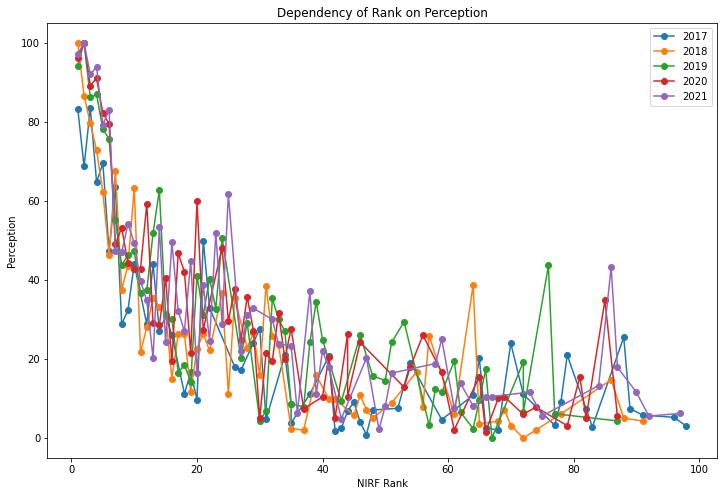

In [11]:
k=['Score','TLR','RPC','GO','OI','Perception']
for x in k:
    for i,j in data.groupby('year'):
        plt.plot(j['Rank'],j[f"{x}"],'o-',label=f"{i}")
    plt.title(f"Dependency of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("NIRF Rank")
    plt.legend()
    plt.show()

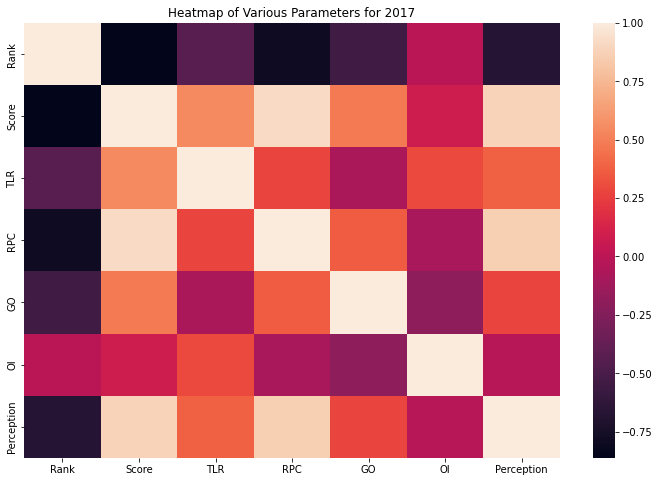

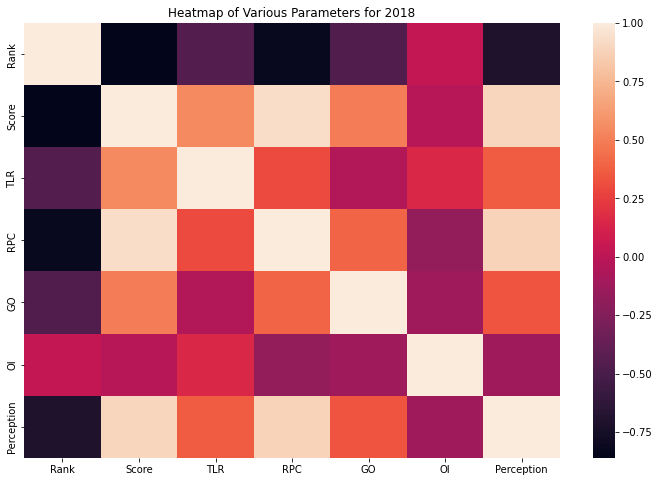

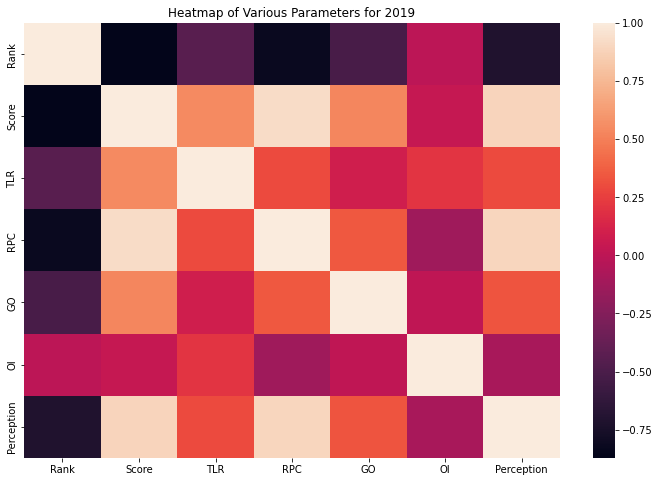

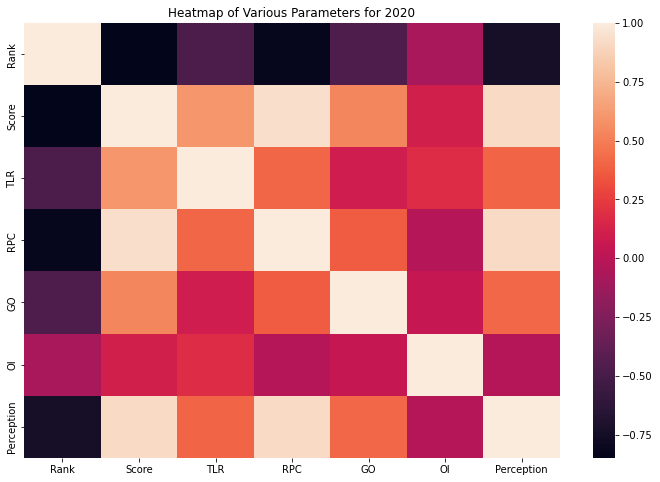

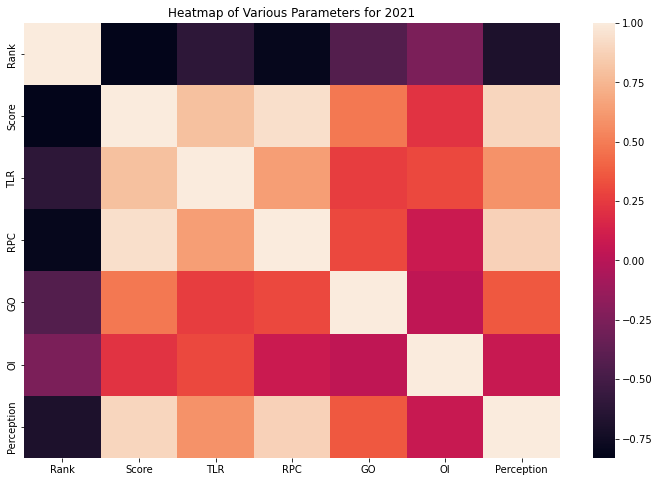

In [12]:
k=['Rank','Score','TLR','RPC','GO','OI','Perception']
for i,j in data.groupby('year'):
    plt.title(f"Heatmap of Various Parameters for {i}")
    sns.heatmap(j[k].corr())
    plt.show()

# Trends only for top 10 overall over the years

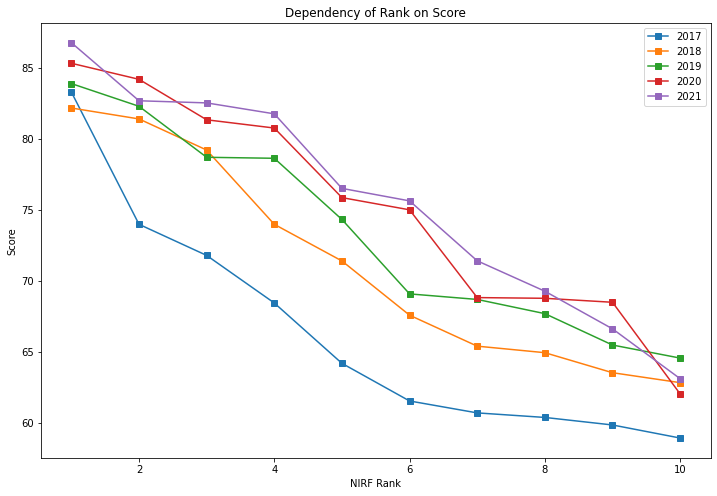

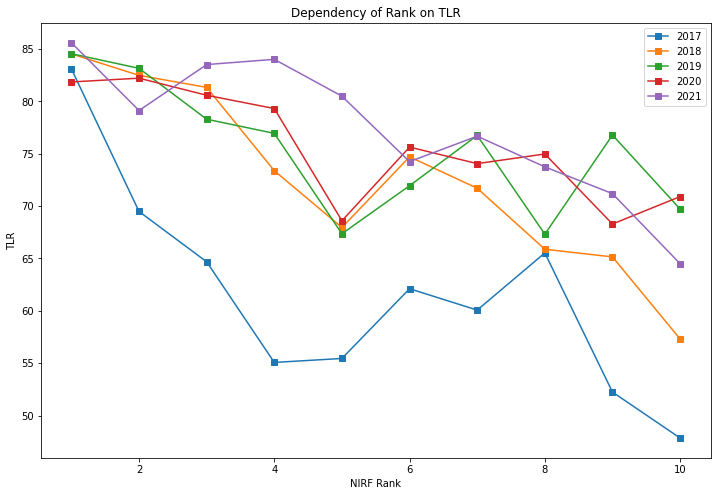

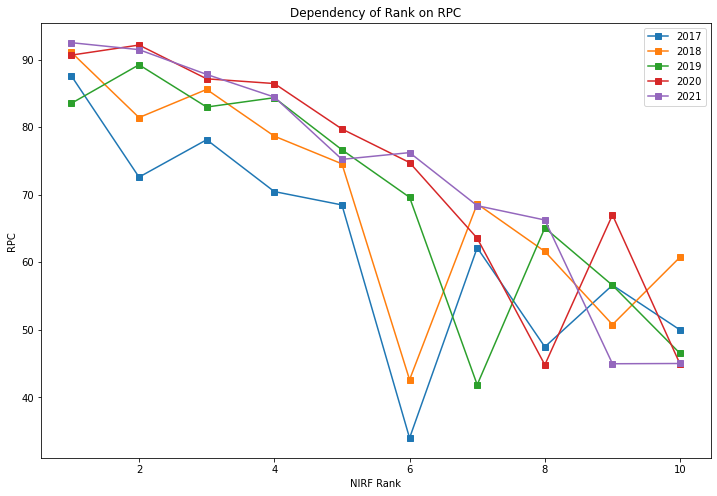

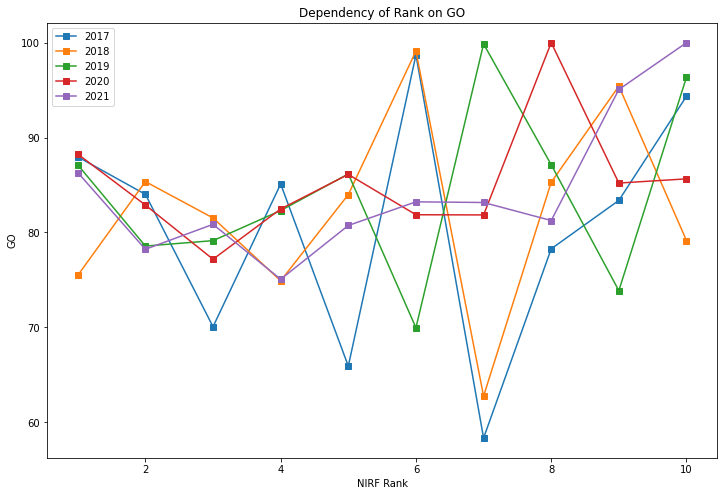

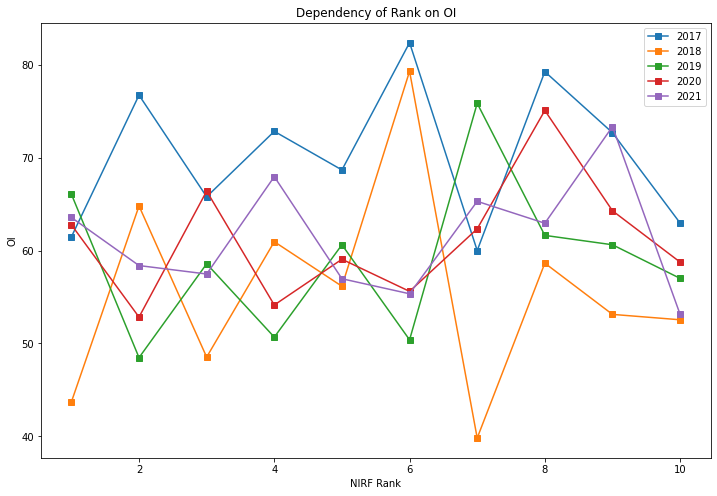

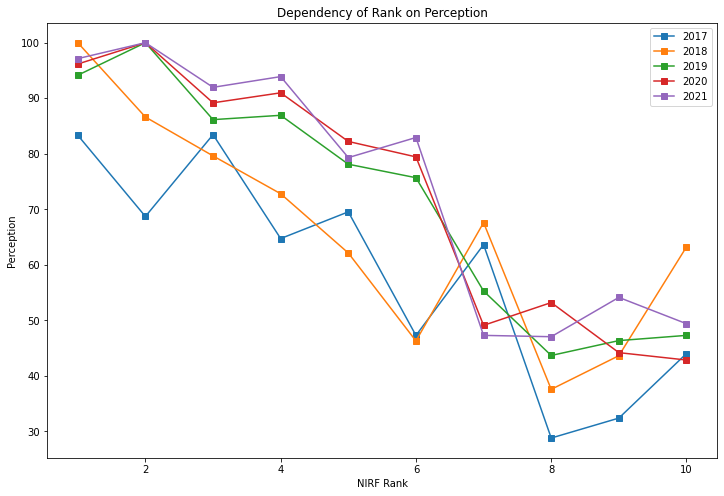

In [13]:
top10data = data.query("Rank <= 10")
k=['Score','TLR','RPC','GO','OI','Perception']
for x in k:
    for i,j in top10data.groupby('year'):
        plt.plot(j['Rank'],j[f"{x}"],'s-',label=f"{i}")
    plt.title(f"Dependency of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("NIRF Rank")
    plt.legend()
    plt.show()

# Yearly trends for top 10 overall in NIRF 2021

In [14]:
top102021 = list(overall['2021'].head(10)['Institute Name'])

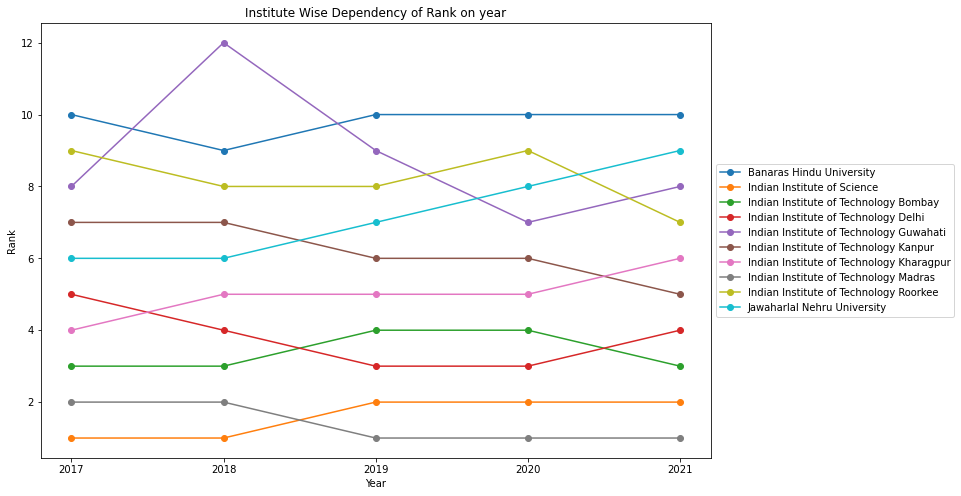

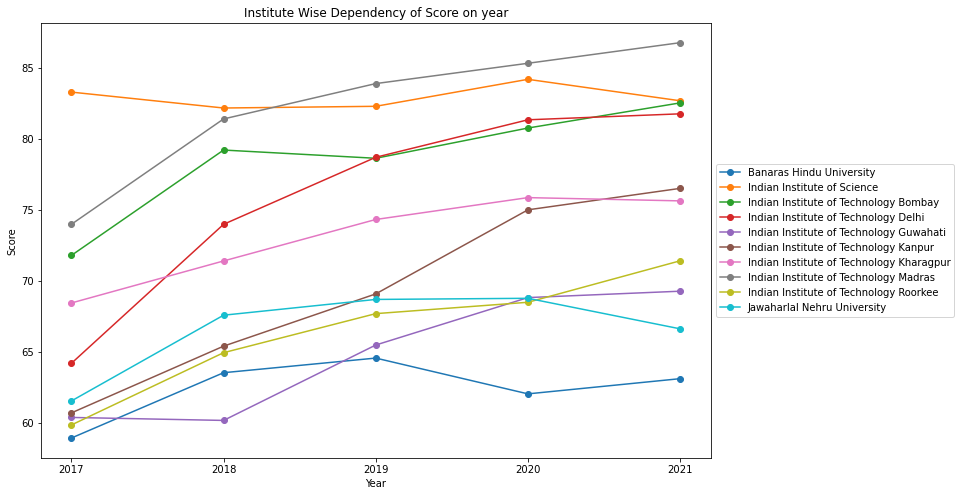

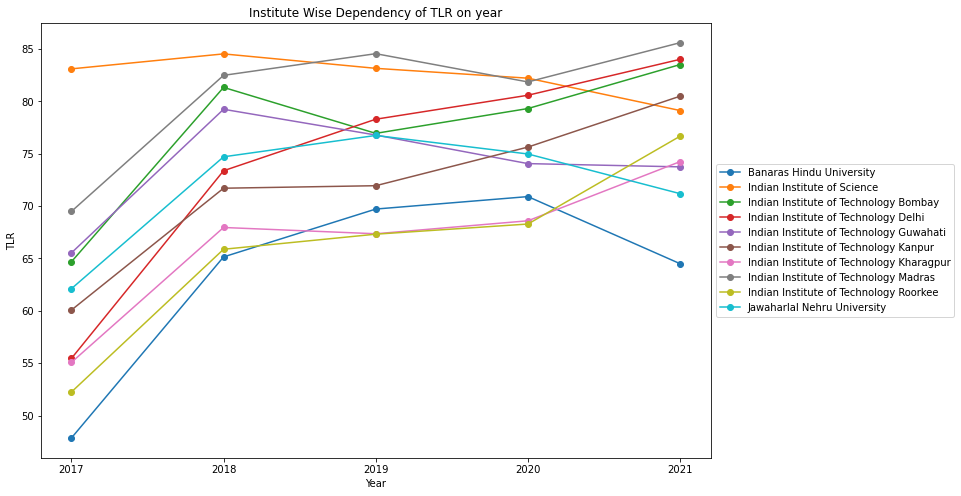

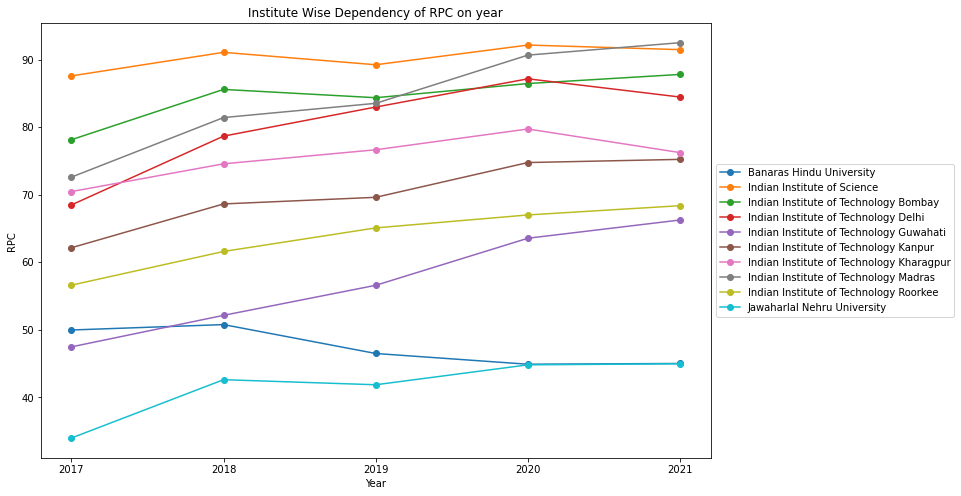

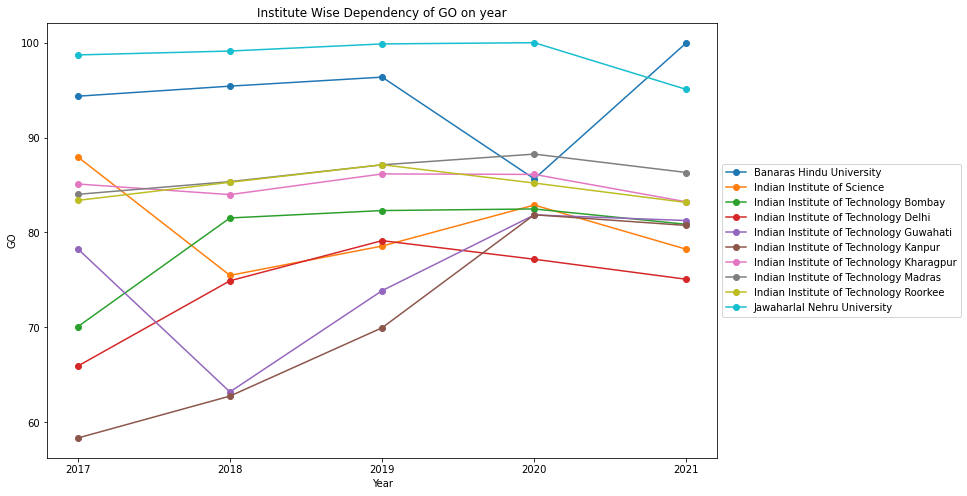

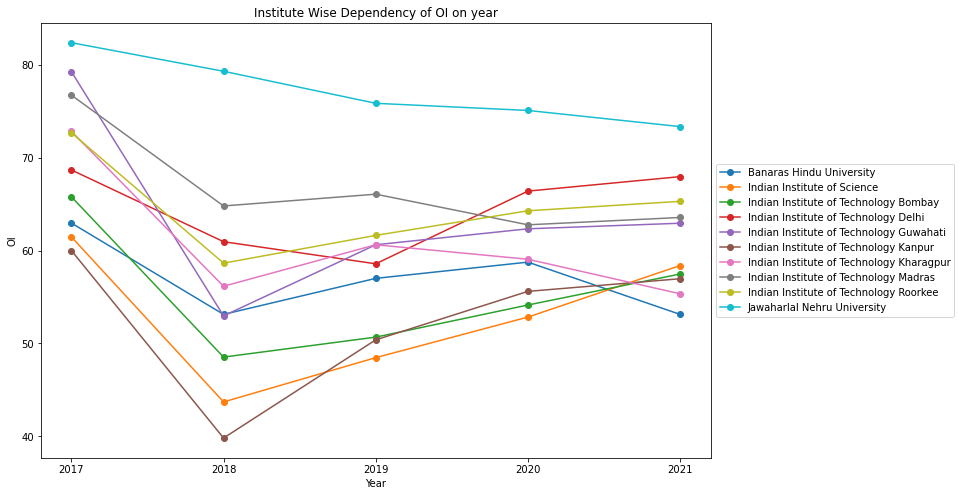

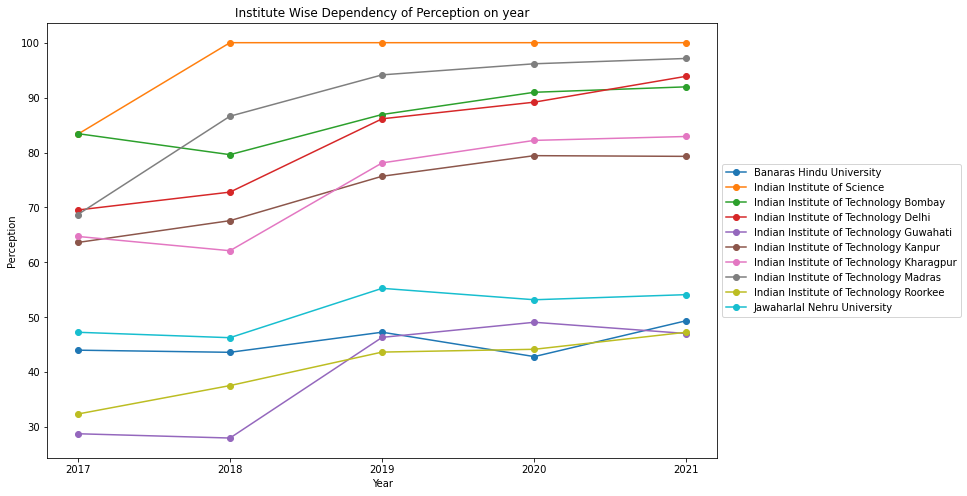

In [15]:
h=['Rank','Score','TLR','RPC','GO','OI','Perception']

for val in h:
    for i,j in data.groupby('Institute Name'):
        if(i in top102021):
            plt.plot(j['year'],j[f'{val}'],'o-',label=f"{i}")
    plt.title(f"Institute Wise Dependency of {val} on year")
    plt.ylabel(f"{val}")
    plt.xlabel("Year")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()



In [16]:
data_test=data[data['year']=='2021']

data_train=data[data['year']!='2021']

test=[]
train=[]
for i in a:
    test.append(data_test[data_test['Institute Name']==i])
    train.append(data_train[data_train['Institute Name']==i])

In [17]:
def prediction(Model):
    models=[]
    for i in train:
        model=Model()
        i['temp']=[1,1,1,1]
        model.fit(np.array(i[['year','temp']]),np.array(i['Score']))
        #print(np.array(i[['year','Score']]))
        models.append(model)
    j=0
    prediction=[]
    actual=[]
    for i in test:
        prediction.append([models[j].predict([[2021,1]]),i['Institute Name'].iloc[0]])
        j+=1
        actual.append([i['Score'].iloc[0],i['Institute Name'].iloc[0]])

    prediction.sort()
    actual.sort()
    prediction=prediction[::-1]
    actual=actual[::-1]

    correct=0
    wrong=0

    y_true=[]
    y_pred=[]

    for i in range(len(prediction)):
        y_pred.append(prediction[i][0][0])
        y_true.append(actual[i][0])
        if prediction[i][1]==actual[i][1]:
            correct+=1
        else:
            wrong+=1

    return r2_score(y_true,y_pred)

print("Linear Regression:",100*prediction(LinearRegression))
print("SVM:",100*prediction(svm.SVR))
print("Random forest:",100*prediction(RandomForestRegressor))

Linear Regression: 87.84316386847338
SVM: 96.95769143091255
Random forest: 98.66634210578077
